In [3]:
from glob import glob
import os
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib import cm
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from rasterio.plot import plotting_extent
import h5py
from shapely.geometry import box
from osgeo import gdal
# optional - turn off warnings
import warnings
warnings.filterwarnings('ignore')

from constants import *
os.chdir(home_dir)

In [ ]:
### read in SWE data and save as npy file
'''
years = range(1987,2017)
months = ['Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
m_num = range(1,13)
days_in_month = [31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30]
os.chdir('/users/marianne/documents/data/reanalysis')
for yr in years:
    hf = h5py.File('SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    lat = hf.get('lat')
    lon = hf.get('lon')
    for i in range(len(days_in_month)):
        start = sum(days_in_month[0:i-1])
        end = start + days_in_month[i]
        tmp = swe[start:end,0:2850,:]
        tmp = tmp.astype('float')
        for a in range(days_in_month[i]):
            for b in range(2850):
                for c in range(6601):
                    try:
                        if tmp[a,b,c]<0:
                            tmp[a,b,c] = np.nan
                    except:
                        continue
        da = xr.DataArray(
                data = np.nanmean(tmp,axis=0),
                dims = ["lon","lat"],
                coords = dict(
                    lon=(lon[:2850,0]),
                    lat=(lat[0,:]),
                )
            )
        np.save('swe_'+str(yr)+'_'+months[i]+'_N.npy',da,allow_pickle=True)

    for i in range(len(days_in_month)):
        start = sum(days_in_month[0:i-1])
        end = start + days_in_month[i]
        tmp = swe[start:end,2850:,:]
        tmp = tmp.astype('float32')/1000
        for a in range(days_in_month[i]):
            for b in range(2850,2850*2):
                for c in range(6601):
                    try: 
                        if tmp[a,b,c]<0:
                            tmp[a,b,c] = np.nan
                    except:
                        continue
        da = xr.DataArray(
                data = np.nanmean(tmp,axis=0),
                dims = ["lon","lat"],
                coords = dict(
                    lon=(lon[2850:,0]),
                    lat=(lat[0,:]),
                )
            )
        np.save('swe_'+str(yr)+'_'+months[i]+'_S.npy',da,allow_pickle=True)
'''

In [3]:
### getr max swe for each year and save

fp = 'c:/users/marianne/documents/data/reanalysis/h5/'
# daily_swe = {}
#daily_swe_total = {}
#max_day = []
#max_swe = []
daily_swe_mean = {}
for yr in range(1985 , 2016):
    hf = h5py.File(fp + 'SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    dailyswe = []
    numpixels = []
    for i in range(365):
        swe_tmp = np.array(swe[i,:,:])
        swe_tmp=swe_tmp[swe_tmp>0]
        dailyswe.append(np.nanmean(swe_tmp))
        numpixels.append(len(swe_tmp))
    dailyswe=np.array(dailyswe)
    numpixels = np.array(numpixels)
    #maxswe = np.nanmax(dailyswe[numpixels>1e6])
    #maxday = np.where(dailyswe == maxswe)[0][0]
    daily_swe_mean[yr] = dailyswe
    #max_day.append(maxday)
    #max_swe.append(maxswe)


## save to npy files in home directory
np.save('data/daily_swe_mean.npy',daily_swe_mean)
#np.save('data/daily_swe_sum.npy',daily_swe_total)
#np.save('data/max_day.npy',max_day)
#np.save('data/max_swe.npy',max_swe)


In [10]:
max_day = np.load('data/max_day.npy')

In [11]:
import h5py
max_path = 'c:/users/marianne/documents/data/'

max_swe_map = {}
i=0
for yr in range(1985,1986):
    #file = 'data/data'+str(yr)+'.npy'
    #data =np.load(file,allow_pickle=True).reshape((1))[0]
    hf = h5py.File('/users/marianne/documents/data/reanalysis/h5/SN_SWE_WY'+ str(yr) + '.h5', 'r')
    swe = hf.get('SWE')
    idx = max_day[i]
    i=i+1
    tmp = swe[idx,:,:]
    max_swe_map[yr] = tmp
    data = swe[idx,:,:]
    lat = hf.get('lat')
    lon = hf.get('lon')
    data = np.float32(data)
    data[data<0] = np.nan
    rows = lon[:].flatten()
    cols = lat[:].flatten()
    im_save = xr.DataArray(data.transpose(), dims=('y', 'x'), 
            coords={'x': rows, 'y': cols})
    #im_save.rio.to_raster(max_path + 'max_swe'+str(yr)+'.tif')
    #rio.to_raster('c:/users/marianne/documents/data/swe_max/swe_max_'+str(yr)+'.tif')
#np.save('data/max_swe_map.npy',max_swe_map)

In [25]:
shapefile = gpd.read_file('data/sn_watersheds.shp')

#test_clipped = test.rio.clip(shapefile.geometry, all_touched=True,from_disk=True)


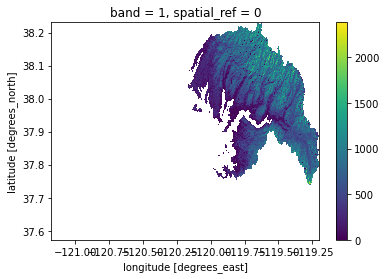

In [47]:
test = test.rio.write_crs(tmp.crs)
tmp = shapefile[shapefile['name'] == 'Upper Tuolumne']
clipped = test.rio.clip(tmp.geometry,all_touched=True)
clipped.plot()

In [45]:
test = test.rio.write_crs(tmp.crs)

In [ ]:
## save data as lat lon
days = range(90,200,10)
for yr in range(1985,2017):
    hf = h5py.File(filepath + 'SN_SWE_WY'+str(yr)+ '.h5', 'r')
    swe = hf.get('SWE')
    lat = hf.get('lat')
    lon = hf.get('lon')
    data = {}
    for i in days:
        tmp = np.array(swe[i,:,:]).flatten()
        tmp = tmp[np.where((tmp>0) & (tmp<2000))]
        data[i]=tmp
    np.save('data'+str(yr)+'.npy',data,allow_pickle=True)

In [ ]:

yr = 2000
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
show(dataset)

summer = cm.get_cmap('summer', 256)
newcolors = summer(np.linspace(0, 1, 256))
white = np.array([1,1,1,0])
newcolors[:10, :] = white
newcmp = matplotlib.colors.ListedColormap(newcolors)

sn_geom = sn_watersheds.to_crs(dataset.rio.crs)
f,ax=plt.subplots(1,2)
yr = 2004
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)
ax[0].imshow(avhrr_clip[0,:,:],
            # ax=ax[0],
            # title = 'max NDVI ' + str(yr),
            cmap = newcmp)
yr=2013
dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)

ax[1].imshow(avhrr_clip[0,:,:],
            # ax=ax[1],
            # title = 'max NDVI ' + str(yr),
            cmap = newcmp)

max_ndvi=[]
for yr in range(1980,2016):
    dataset = rxr.open_rasterio('\\users\\marianne\\documents\\data\\pe_snow_fires_data\\max-ndvi\\max-ndvi-'+str(yr)+'.tif')
    avhrr_clip = dataset.rio.clip(sn_geom.geometry,
            all_touched=True,
            from_disk=True)
    max_ndvi.append(np.nanmean(avhrr_clip.values))
    # print(np.nanmean(avhrr_clip.values))


np.save('max_ndvi_years.npy',max_ndvi)